In [25]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from timeit import default_timer as timer
# minmax归一化处理
from sklearn.preprocessing import MinMaxScaler

from tqdm.auto import tqdm

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [26]:
import os

# 1. 输出当前的目录 (当前工作目录)
current_dir = os.getcwd()
print(f"当前工作目录是: {current_dir}")

# 2. 获取该目录的母目录（父目录）的路径
# os.path.dirname() 用于获取路径的目录部分
parent_dir = os.path.dirname(current_dir)
print(f"母目录: {parent_dir}")
data_dir = os.path.join(parent_dir, "data")
data_dir

当前工作目录是: N:\工程实践3\GDP_LSTM
母目录: N:\工程实践3


'N:\\工程实践3\\data'

In [27]:
PROVINCES = [
    "北京市",
    "天津市",
    "上海市",
    "重庆市",
    "内蒙古自治区",
    "广西壮族自治区",
    "西藏自治区",
    "宁夏回族自治区",
    "新疆维吾尔自治区",
    "河北省",
    "山西省",
    "辽宁省",
    "吉林省",
    "黑龙江省",
    "江苏省",
    "浙江省",
    "安徽省",
    "福建省",
    "江西省",
    "山东省",
    "河南省",
    "湖北省",
    "湖南省",
    "广东省",
    "海南省",
    "四川省",
    "贵州省",
    "云南省",
    "陕西省",
    "甘肃省",
    "青海省"
]
# 验证列表的长度（应为 31）
print(f"省级行政区总数: {len(PROVINCES)}")

# 打印列表内容以供查看
print("PROVINCES 列表内容:")
for province in PROVINCES:
    print(f"- {province}")

省级行政区总数: 31
PROVINCES 列表内容:
- 北京市
- 天津市
- 上海市
- 重庆市
- 内蒙古自治区
- 广西壮族自治区
- 西藏自治区
- 宁夏回族自治区
- 新疆维吾尔自治区
- 河北省
- 山西省
- 辽宁省
- 吉林省
- 黑龙江省
- 江苏省
- 浙江省
- 安徽省
- 福建省
- 江西省
- 山东省
- 河南省
- 湖北省
- 湖南省
- 广东省
- 海南省
- 四川省
- 贵州省
- 云南省
- 陕西省
- 甘肃省
- 青海省


In [28]:
data_path = 'data'
year_population_path = 'data/YearPeople.csv'
year_consumption_path = 'data/YearXiaofei.csv'
year_gdp_path = 'data/YearGDP.csv'
year_financial = 'data/YearFinancial.csv'
province='上海市'

* 因为所需要的数据单位不相同，要进行归一化处理，免除单位对模型预测的影响。
* 分子 = 此时的值 - 这一组数据中的最小值；
* 分母 = 这一组数据中的最大值 - 这一组数据中的最小值


In [29]:
population = pd.read_csv(year_population_path)[province] #单位是万
comsumption = pd.read_csv(year_consumption_path)[province] #单位是亿
GDP = pd.read_csv(year_gdp_path)[province] #单位是亿
financial = pd.read_csv(year_financial)[province] #单位是亿
population_and_comsumption = pd.concat(
    [population, comsumption,GDP,financial],
    axis=1,
)
population_and_comsumption.columns = ['polulation', 'consumption','GDP','financial']
# 从头到尾，以 -1 的步长进行选择。将整个序列的元素顺序完全反转，但是索引不会变化
df_reversed = population_and_comsumption.iloc[::-1]
# 将反转后的数组重新设置索引，
df_reversed_and_reset = df_reversed.reset_index(drop=True)
# 计算它们的归一化数值
data_for_scaling = df_reversed_and_reset.values # 转换为 NumPy 数组
# 使用scarler进行归一化处理数据
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_for_scaling)
# 参数展示
df_reversed_and_reset,data_for_scaling,data_scaled

(    polulation  consumption      GDP  financial
 0         1890       2979.5   9398.8    1646.26
 1         1964       3375.2  10825.4    1795.57
 2         2064       3873.3  13179.8    2181.68
 3         2141       4577.2  14877.1    2593.92
 4         2210       5173.2  16181.4    2989.65
 5         2303       6186.6  18319.6    3302.89
 6         2356       7185.8  20406.1    3914.88
 7         2399       7840.4  21774.9    4184.02
 8         2448       8557.0  23809.4    4528.61
 9         2467       9303.5  25964.5    4923.44
 10        2458      11605.7  27821.6    6191.56
 11        2467      12588.2  30963.9    6918.94
 12        2466      13699.5  34378.3    7547.62
 13        2475      14874.8  37769.1    8351.54
 14        2481      15469.0  40241.2    8179.28
 15        2488      15189.2  41603.9    8102.11
 16        2489      16818.3  47059.4    8430.86
 17        2475      14918.2  48594.5    9393.00
 18        2487      16385.8  51404.5    9638.51
 19        2480     

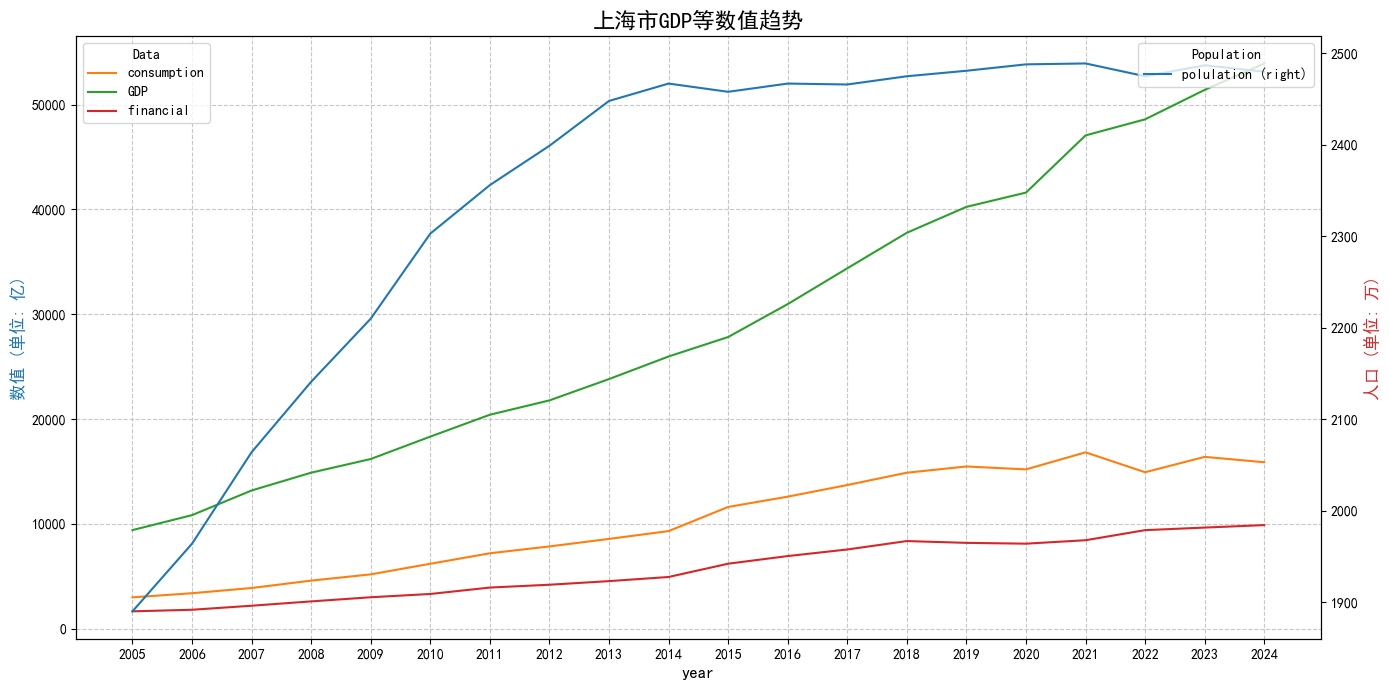

In [30]:
N = len(population_and_comsumption)
# 创建x轴刻度的位置
tick_positions = np.arange(N)
# 创建x轴刻度的标签
custom_labels = np.arange(2005, 2005 + N, +1)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(14, 7))

ax = df_reversed_and_reset.plot(
    kind='line',
    ax=ax,
    secondary_y=['polulation']
)

plt.xticks(
    ticks=tick_positions,
    labels=custom_labels,
    rotation=45,
    ha='right'
)

# 设置左侧 Y 轴标签
ax.set_ylabel('数值 (单位: 亿)', fontsize=12, color='C0')
# 设置右侧Y 轴标签
ax.right_ax.set_ylabel('人口 (单位: 万)', fontsize=12, color='tab:red')

ax.set_title(f'{province}GDP等数值趋势', fontsize=16)

ax.set_xlabel('year', fontsize=12)

ax.legend(title='Data', loc='upper left')
ax.right_ax.legend(title='Population', loc='upper right')

ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

* 需要将numpy数组类型数据转换成tensor数据格式
20代表时间序列长度，4代表特征输入数，分别是GDP、人口、财政支出、消费品数据，以上数据都是年度数据。

In [31]:
# 处理数据
# 20个年份，4个特征
data_tensor = torch.from_numpy(data_scaled).float()
# data_tensor = torch.FloatTensor(data_np)
data_tensor.shape,data_tensor.type()

(torch.Size([20, 4]), 'torch.FloatTensor')

* LSTM
1. input_size = 输入序列中，每个时间步长的特征数量，也就是我的输入特征数，人口、GDP、消费、财政支出
2. hidden_size = 隐状态的特征维度，就用input_size * 2 的数量
3. num_layers = 堆叠的 LSTM 层数
4. 参数定义时需要确定批次是否需要放置第一位，未标识的话就放在第二位。  [B,D,W] D->序列长度，也就是时间。W数据向量维度

In [32]:
batch_size = 1
seq_len = 20      # 输入的序列长度
embed_dim = 4    # 每个输入元素的特征维度
hidden_size = 4 * 2    # 隐状态的特征维度，根据工程经验可取 hidden_size = embed_dim * 2
num_layers = 2

torch.manual_seed(42)
# 输入、隐藏、堆叠的LSTM层数是必须的
lstm = nn.LSTM(
    input_size=embed_dim,
    hidden_size=hidden_size,
    num_layers=num_layers,
    batch_first=True)
input = torch.randn(batch_size, seq_len, embed_dim)
# lstm神经网络会返回三个值，
# output是输出形状
# hn隐藏层状态形状
# cn细胞层状态形状
output, (hn, cn) = lstm(input)
input.shape,output.shape,hn.shape,cn.shape

(torch.Size([1, 20, 4]),
 torch.Size([1, 20, 8]),
 torch.Size([2, 1, 8]),
 torch.Size([2, 1, 8]))

* Seq2Seq模型模型由两部分组成：
1. 编码器(Encoder)
    * 逐个标记地处理输入序列。
    * 将整个序列编码为固定长度的上下文向量（或一系列隐藏状态），总结输入中的重要信息。
2. 解码器(Decoder)
    * 将上下文向量作为输入。
    * 每次生成一个标记的输出序列，并根据上下文向量和先前生成的标记预测每个标记。
* !! 接收历史输入序列（如过去 20 年的 4 个特征），并返回一个上下文向量（即最后的隐状态 hn 和细胞状态 cn)
* 接收编码器的上下文向量作为初始状态，然后逐步生成未来的预测序列（如未来 3 年的 1 个特征：GDP）。

In [33]:
# ---超参数定义--- #
INPUT_FEATURE_SIZE = 4     #输入特征
OUTPUT_FEATURE_SIZE = 1    #输出GDP预测值
HIDDEN_SIZE = INPUT_FEATURE_SIZE * 2       #隐藏层
NUM_LAYERS = 2
PREDICT_STEPS = 1 #预测未来两年的GDP数据
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class Seq2Seq(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, predict_steps):
        super().__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
        self.predict_steps = predict_steps
        # 编码器负责处理历史输入
        self.encoder = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        # 解码器负责生成未来预测序列
        self.decoder = nn.LSTM(output_size, hidden_size, num_layers, batch_first=True)
        # 输出全连接层 (将隐状态 H 映射到最终的预测值 1)
        self.fc = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        # 得到整个历史序列的最终隐状态作为上下文向量 (hn, cn)
        # enc_hn, enc_cn 形状: (num_layers, B, H)
        if not isinstance(x, torch.Tensor):
             print(f"!!! 错误诊断: x 在 forward 开始时不是 Tensor，而是 {type(x)} !!!")
             # 这里可能会触发错误
             x_size_0 = x.size(0)
        else:
             x_size_0 = x.size(0)

        # 1. 编码器阶段
        _, (enc_hn, enc_cn) = self.encoder(x)
        # 初始化结果容器，用来存储未来时间步的GDP预测值
        predictions = torch.zeros(x.size(0), self.predict_steps, self.output_size).to(x.device)
        # 初始化解码器的第一个输入（未来的数据全为0）
        dec_input = torch.zeros(x.size(0), 1, self.output_size).to(x.device)
        # 初始化解码器的隐藏状态 (继承自编码器)
        decoder_h = enc_hn
        decoder_c = enc_cn
        # 4. 迭代预测未来 P 个时间步
        for t in range(self.predict_steps):
            dec_output, (decoder_h, decoder_c) = self.decoder(
                dec_input, # 【1，1，1】
                (decoder_h, decoder_c)
            )
            pred = self.fc(dec_output.squeeze(1))
            # 将预测的值存储到容器中
            predictions[:, t, :] = pred
            # 将当前的解码器重新增加一个时间步维度
            dec_input = pred.unsqueeze(1)

        return predictions

model = Seq2Seq(
    input_size=INPUT_FEATURE_SIZE,
    hidden_size=HIDDEN_SIZE,
    num_layers=NUM_LAYERS,
    output_size=OUTPUT_FEATURE_SIZE,
    predict_steps=PREDICT_STEPS
).to(device)

BATCH_SIZE = 1
WINDOW_SIZE = 3 #历史窗口
x_dummy = torch.randn(BATCH_SIZE,WINDOW_SIZE, INPUT_FEATURE_SIZE).to(device)

print("--- 尝试直接运行 Model Forward ---")
try:
    with torch.no_grad():
        predictions = model(x_dummy)
    print(" Model forward pass successful!")
    print(f"最终输出形状: {predictions.shape}")

except Exception as e:
    print(f"❌ Model forward pass failed. 请检查上一部分的诊断输出。错误: {e}")

--- 尝试直接运行 Model Forward ---
 Model forward pass successful!
最终输出形状: torch.Size([1, 1, 1])


In [34]:
# 打印模型结构
print("\n--- Model Structure ---")
print(model)

# 计算总参数数量
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\n--- Total Trainable Parameters ---")
print(f"Total Params (Manual Count): {total_params:,}")


--- Model Structure ---
Seq2Seq(
  (encoder): LSTM(4, 8, num_layers=2, batch_first=True)
  (decoder): LSTM(1, 8, num_layers=2, batch_first=True)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

--- Total Trainable Parameters ---
Total Params (Manual Count): 1,961


In [35]:
data_tensor = data_tensor.unsqueeze(0)
data_tensor = data_tensor.to(device)
data_tensor.shape

torch.Size([1, 20, 4])

In [36]:
pre = model(data_tensor)
pre

tensor([[[-0.0346]]], device='cuda:0', grad_fn=<CopySlices>)

In [37]:
pre_np = pre.cpu().detach().numpy()
pre_2d = pre_np.reshape(-1, 1)
pre_np.shape,pre_2d.shape

((1, 1, 1), (1, 1))

In [38]:
GDP_COL_INDEX = 2
# 创建三行四列的数值全为零的数组
temp_inverse_input = np.zeros((pre_2d.shape[0], 4))
temp_inverse_input[:, GDP_COL_INDEX] = pre_2d.flatten()
temp_inverse_input


array([[ 0.        ,  0.        , -0.03457443,  0.        ]])

In [39]:
final_predictions_4col = scaler.inverse_transform(temp_inverse_input)
final_gdp_values = final_predictions_4col[:, GDP_COL_INDEX]
start_year = 2025
years = range(start_year, start_year + len(final_gdp_values))

output_df = pd.DataFrame(
    final_gdp_values,
    index=years,
    columns=['GDP 预测值 (亿)']
)

print("\n--- 未来两年 GDP 预测结果 ---")
output_df


--- 未来两年 GDP 预测结果 ---


,GDP 预测值 (亿)
2025,7859.273385


In [40]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def print_train_time(start:float,
                     end:float,
                     device):
    total_time = end - start
    print(f"在{device}上训练的时间：{total_time:.3f} s")
    return total_time

In [41]:
data_scaled.shape

(20, 4)

In [42]:
def create_training_sequences(data, input_window, output_steps, target_index):
    X, Y = [], []
    N_total = len(data)

    for i in range(N_total - input_window - output_steps + 1):
        x_sequence = data[i : i + input_window, :]
        X.append(x_sequence)

        y_sequence = data[i + input_window : i + input_window + output_steps, target_index]
        Y.append(y_sequence)

    X_train_np = np.array(X)
    Y_train_np = np.array(Y)

    # 确保 Y 数组形状为 (N, P, 1)
    if Y_train_np.size > 0:
        Y_train_np = Y_train_np.reshape(-1, output_steps, 1)
    else:
        Y_train_np = Y_train_np.reshape(0, output_steps, 1)

    return X_train_np, Y_train_np
X_train_np, Y_train_np = create_training_sequences(
    data_scaled,
    input_window=WINDOW_SIZE,
    output_steps=PREDICT_STEPS,
    target_index=GDP_COL_INDEX
)
X_train_np.shape,Y_train_np.shape,list(X_train_np)

((17, 3, 4),
 (17, 1, 1),
 [array([[0.        , 0.        , 0.        , 0.        ],
         [0.12353923, 0.02859352, 0.03203834, 0.01814529],
         [0.29048414, 0.06458652, 0.08491305, 0.06506833]]),
  array([[0.12353923, 0.02859352, 0.03203834, 0.01814529],
         [0.29048414, 0.06458652, 0.08491305, 0.06506833],
         [0.41903172, 0.11545076, 0.12303073, 0.11516689]]),
  array([[0.29048414, 0.06458652, 0.08491305, 0.06506833],
         [0.41903172, 0.11545076, 0.12303073, 0.11516689],
         [0.53422371, 0.15851808, 0.15232248, 0.16325903]]),
  array([[0.41903172, 0.11545076, 0.12303073, 0.11516689],
         [0.53422371, 0.15851808, 0.15232248, 0.16325903],
         [0.68948247, 0.23174697, 0.20034181, 0.20132635]]),
  array([[0.53422371, 0.15851808, 0.15232248, 0.16325903],
         [0.68948247, 0.23174697, 0.20034181, 0.20132635],
         [0.77796327, 0.30394976, 0.24720007, 0.27570006]]),
  array([[0.68948247, 0.23174697, 0.20034181, 0.20132635],
         [0.77796327

In [43]:
final_data = X_train_np[10]
final_data = torch.from_numpy(final_data).float().to(device).unsqueeze(0)
final_data.shape

torch.Size([1, 3, 4])

In [44]:
torch.manual_seed(42)
def mae_metric(predictions, targets):
    return torch.nn.functional.l1_loss(predictions, targets)

def train_model_single_batch(model, X_np, Y_np, criterion, optimizer, num_epochs, device):

    model.train()
    N = len(X_np)
    start_time = timer()

    if N == 0:
        print("警告: 训练样本数为 0，请检查数据长度和 WINDOW/PREDICT_STEPS 设置。")
        return

    for epoch in range(num_epochs):
        epoch_loss = 0.0
        epoch_mae = 0.0
        for i in range(N):
            # 转换为 Tensor 并增加批次维度 (Batch=1)
            x_sample = torch.from_numpy(X_np[i]).float().unsqueeze(0).to(device)
            y_sample = torch.from_numpy(Y_np[i]).float().unsqueeze(0).to(device)

            optimizer.zero_grad()
            predictions = model(x_sample)
            loss = criterion(predictions, y_sample)
            mae = mae_metric(predictions, y_sample)

            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            epoch_mae += mae.item()
        avg_loss = epoch_loss / N
        avg_mae = epoch_mae / N

        if (epoch + 1) % 20 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {avg_loss:.4f}, Training MAE: {avg_mae:.4f}')

    end_time = timer()
    print(f"\n--- 训练完成！总耗时: {end_time - start_time:.2f} 秒 ---")
train_model_single_batch(
    model,
    X_train_np,
    Y_train_np,
    loss_fn,
    optimizer,
    100,
    device
)

Epoch [1/100], Training Loss: 0.3245, Training MAE: 0.5138
Epoch [20/100], Training Loss: 0.0017, Training MAE: 0.0295
Epoch [40/100], Training Loss: 0.0011, Training MAE: 0.0240
Epoch [60/100], Training Loss: 0.0008, Training MAE: 0.0206
Epoch [80/100], Training Loss: 0.0007, Training MAE: 0.0173
Epoch [100/100], Training Loss: 0.0005, Training MAE: 0.0151

--- 训练完成！总耗时: 9.76 秒 ---


In [45]:
X_train_np

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.12353923, 0.02859352, 0.03203834, 0.01814529],
        [0.29048414, 0.06458652, 0.08491305, 0.06506833]],

       [[0.12353923, 0.02859352, 0.03203834, 0.01814529],
        [0.29048414, 0.06458652, 0.08491305, 0.06506833],
        [0.41903172, 0.11545076, 0.12303073, 0.11516689]],

       [[0.29048414, 0.06458652, 0.08491305, 0.06506833],
        [0.41903172, 0.11545076, 0.12303073, 0.11516689],
        [0.53422371, 0.15851808, 0.15232248, 0.16325903]],

       [[0.41903172, 0.11545076, 0.12303073, 0.11516689],
        [0.53422371, 0.15851808, 0.15232248, 0.16325903],
        [0.68948247, 0.23174697, 0.20034181, 0.20132635]],

       [[0.53422371, 0.15851808, 0.15232248, 0.16325903],
        [0.68948247, 0.23174697, 0.20034181, 0.20132635],
        [0.77796327, 0.30394976, 0.24720007, 0.27570006]],

       [[0.68948247, 0.23174697, 0.20034181, 0.20132635],
        [0.77796327, 0.30394976, 0.24720007, 0.27570006],
    

In [46]:
model.eval()

with torch.no_grad():
    predictions = model(final_data)

pre_np = predictions.cpu().detach().numpy()
pre_2d = pre_np.reshape(-1, 1)
predictions.shape,pre_np.shape,pre_2d.shape


(torch.Size([1, 1, 1]), (1, 1, 1), (1, 1))

In [47]:
GDP_COL_INDEX = 2
# 创建三行四列的数值全为零的数组
temp_inverse_input = np.zeros((pre_2d.shape[0], 4))
temp_inverse_input[:, GDP_COL_INDEX] = pre_2d.flatten()
temp_inverse_input

array([[0.        , 0.        , 0.62100494, 0.        ]])

In [48]:
final_predictions_4col = scaler.inverse_transform(temp_inverse_input)
final_gdp_values = final_predictions_4col[:, GDP_COL_INDEX]
start_year = 2023
years = range(start_year, start_year + len(final_gdp_values))

output_df = pd.DataFrame(
    final_gdp_values,
    index=years,
    columns=['GDP 预测值 (亿)']
)

print("\n--- 未来两年 GDP 预测结果 ---")
output_df


--- 未来两年 GDP 预测结果 ---


,GDP 预测值 (亿)
2023,37050.845827
